## Table of contents:

#### 01. Importing libraries and data  
#### 02. The elbow technique
#### 03. k-means clustering
    Scatterplots
    Conclusions
#### 04. Descriptive statistics
    Conclusions
    What could these results be useful for?

### 01. Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [3]:
# Create a folder path

path = r'/Users/edytakowal/Desktop/CareerFoundry/2. Data Immersion/6. Advanced Analytics & Dashboard Design/World_Happiness_Report'

In [4]:
# Import the data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'), index_col = False)
df.head()

,Unnamed: 0,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,year,happiness_rank,avg_happiness_score,happiness_category
0,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,7.493322,Happy
1,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,7.522278,Happy
2,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,7.579733,Happy
3,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,7.473889,Happy
4,4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,7.230456,Happy


In [5]:
# Drop coulumn 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
# Check the column names 

df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions',
       'year', 'happiness_rank', 'avg_happiness_score', 'happiness_category'],
      dtype='object')

In [7]:
# Create a subset which contains only the 'Happiness_Score' and indicators

sub = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'corruption_perceptions']]

### 02. The elbow technique

In [8]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

[-2288.1376501858103,
 -906.6167248866914,
 -613.1895353428533,
 -471.2458186771739,
 -400.5983827810027,
 -367.7889708281402,
 -341.7963269473989,
 -318.2682828420904,
 -302.39185885734196]

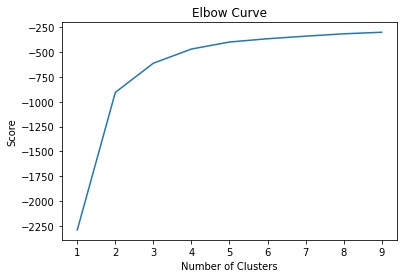

In [10]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is three.

### 03. k-means clustering

In [11]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [12]:
# Fit the k-means object to the data

kmeans.fit(sub)

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [13]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-13-04c1f2f7632a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [14]:
sub.head()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,corruption_perceptions,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,0


In [15]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

2    540
1    442
0    384
Name: clusters, dtype: int64

#### Scatterplots

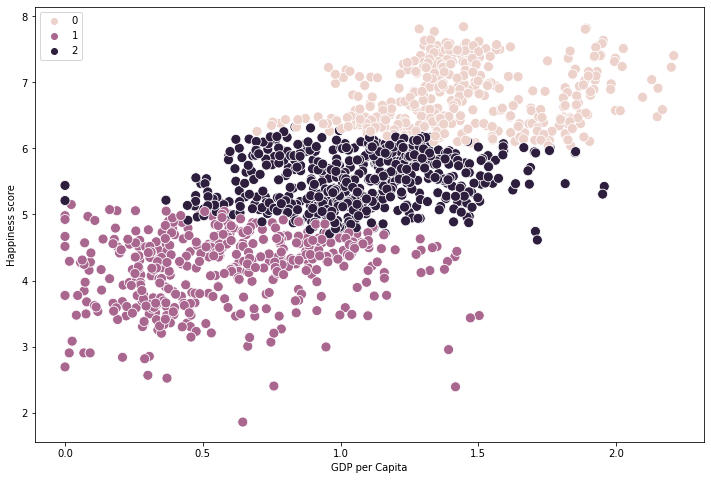

In [16]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['gdp_per_capita'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness score')
plt.show()

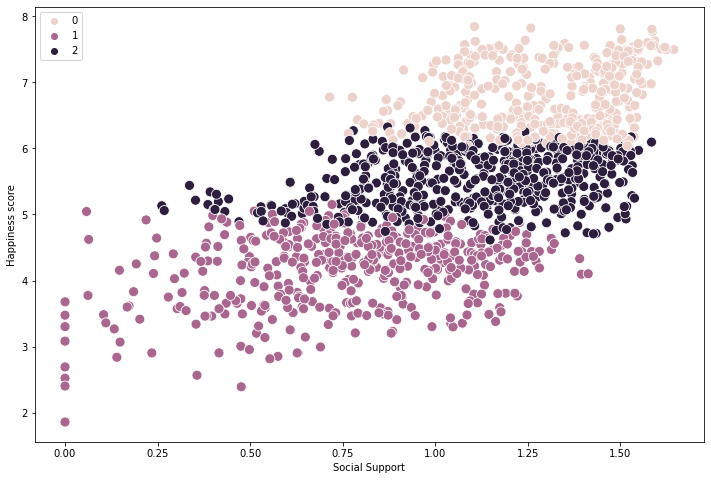

In [17]:
# Plot the clusters for the "Happiness_Score" and "Social support" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['social_support'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Happiness score')
plt.show()

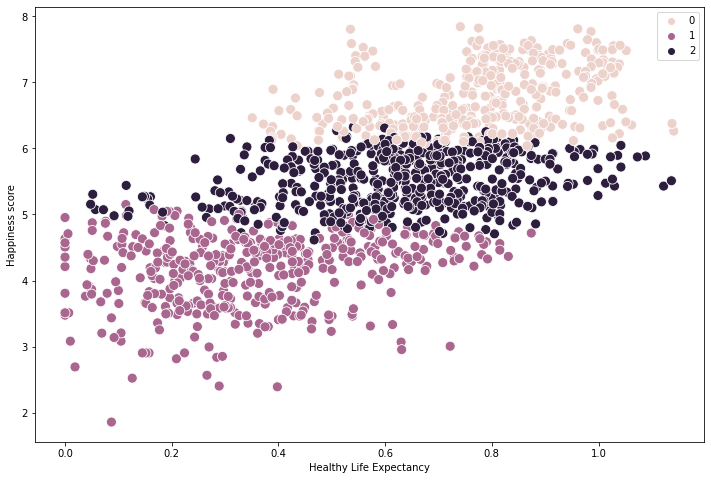

In [20]:
# Plot the clusters for the "Happiness_Score" and "healthy_life_expectancy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['healthy_life_expectancy'], y = sub['happiness_score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness score')
plt.show()

#### Conclusions

The findings suggest that the purple cluster generally has the highest levels of GDP per capita, family support, health, and happiness scores, followed by the pink cluster,while the dark cluster tends to have lower levels on these indicators. These clusters represent different levels of economic development and well-being, with the purple cluster being the most prosperous and happy, and the dark cluster being the least.

### 04. Descriptive statistics 

In [21]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/edytakowal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [22]:
sub.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'social_support':['mean', 'median'], 
                         'healthy_life_expectancy':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

gdp_per_capita           social_support            \
                  mean    median           mean    median   
cluster                                                     
dark          1.065995  1.060490       1.098027  1.140595   
pink          1.451368  1.404353       1.288283  1.314557   
purple        0.586976  0.560740       0.769292  0.788340   

        healthy_life_expectancy           happiness_score          
                           mean    median            mean  median  
cluster                                                            
dark                   0.632731  0.639260        5.520110  5.5235  
pink                   0.772524  0.795231        6.789883  6.7080  
purple                 0.360812  0.342866        4.173941  4.2990

#### Conclusions

Based on these statistics, it appears that the Pink Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. The Purple Cluster exhibits slightly larger differences, indicating slightly more variability within those clusters for some indicators. The Dark Cluster is the most diverse and inconsistent.

#### What could these results be useful for?

The inconsistency within clusters can be used for anomaly detection. If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt additional analysis and  new hypothesis
The findings can help better understand the characteristics of each cluster. 
Within the realm social or public policy, understanding cluster's differences can inform targeted investitions, interventions, or support efforts.
In the context of business and marketing, organizations can use these results to make critical decisions concerning company expansion, product development, and resource allocation.
These clusters can help to monitor changes over time. This can enable to compare whether countries or regions within each cluster improves or deterioratates in key areas such as health, family support, economic conditions, or overall happiness.

In general the results of cluster analysis can be a foundation for a wide range of applications and decision-making processes in various domains, including business, marketing, public policy, healthcare.

In [62]:
# Export the dataframe to csv file

df.to_csv(os.path.join(path, 'Data', 'Prepared Data', '2015-2023.csv'))
sub.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'clusters.csv'))